In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

digit_recognition.ipynb
my_model2.h5
my_model3.h5
my_model4.h5
my_model.h5
sample_submission.csv
test.csv
train.csv



In [2]:
# 学習データの取得
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixcel values
y_train = train.iloc[:, 0].values.astype('int32')
X_test = test.values.astype('float32')

In [5]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
y_train.shape

(42000,)

In [7]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

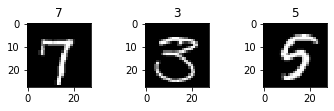

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
print(X_train[0])

[[[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [ 

In [10]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

In [11]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x):
    return (x-mean_px)/std_px

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

/home/ec2-user/.pyenv/versions/3.7.5/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


([<matplotlib.axis.XTick at 0x7f0a685eec90>,
 <a list of 10 Text xticklabel objects>)

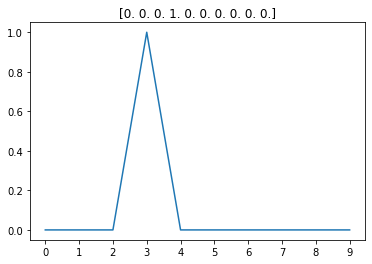

In [13]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10))

In [14]:
seed = 43
np.random.seed(seed)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Convolution2D, MaxPool2D

In [16]:
model = Sequential()
model.add(Lambda(standardize, input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape", model.input_shape)
print("output shape", model.output_shape)

input shape (None, 28, 28, 1)
output shape (None, 10)


In [17]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
from tensorflow.keras.preprocessing import image
gen = image.ImageDataGenerator()
gen

In [21]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [22]:
X_train.shape

(37800, 28, 28, 1)

In [23]:
X_val.shape

(4200, 28, 28, 1)

In [22]:
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=5,
                              validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/5
37800/37800 [==============================] - 563s 15ms/step - loss: 0.2400 - accuracy: 0.9342 - val_loss: 0.3299 - val_accuracy: 0.9098
Epoch 2/5
37800/37800 [==============================] - 562s 15ms/step - loss: 0.2159 - accuracy: 0.9417 - val_loss: 0.3519 - val_accuracy: 0.9091
Epoch 3/5
37800/37800 [==============================] - 562s 15ms/step - loss: 0.2099 - accuracy: 0.9436 - val_loss: 0.3768 - val_accuracy: 0.9026
Epoch 4/5
37800/37800 [==============================] - 563s 15ms/step - loss: 0.2068 - accuracy: 0.9448 - val_loss: 0.3780 - val_accuracy: 0.9105
Epoch 5/5
37800/37800 [==============================] - 564s 15ms/step - loss: 0.2047 - accuracy: 0.9455 - val_loss: 0.3951 - val_accuracy: 0.9036


In [23]:
model.save('./my_model.h5')

In [22]:
from tensorflow.keras.models import load_model

# モデルの読込
model2 = load_model('./my_model.h5')

In [23]:
history_dict = history.history
history_dict.keys()

NameError: name 'history' is not defined

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

NameError: name 'history_dict' is not defined

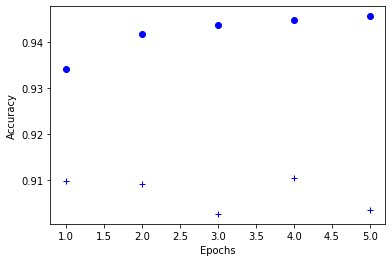

In [29]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [25]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28, 28, 1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [26]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [47]:
history = fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,
                           validation_data=val_batches, validation_steps=val_batches.n)

37800/37800 [==============================] - 620s 16ms/step - loss: 0.1443 - accuracy: 0.9725 - val_loss: 0.5254 - val_accuracy: 0.9500


In [48]:
model.save('./my_model2.h5')

In [26]:
model3 = load_model('./my_model2.h5')

In [27]:
from sklearn.metrics import classification_report

# ディープラーニングmodel3の予測
Y_pred = model3.predict_classes(X_test, verbose=0)

print(classification_report(y_test, Y_pred))

NameError: name 'model3' is not defined

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [29]:
model = get_cnn_model()
model.optimizer.lr=0.01

In [29]:
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=2,
                              validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/2
37800/37800 [==============================] - 3202s 85ms/step - loss: 0.0751 - accuracy: 0.9794 - val_loss: 0.1781 - val_accuracy: 0.9660
Epoch 2/2
37800/37800 [==============================] - 6612s 175ms/step - loss: 0.0829 - accuracy: 0.9808 - val_loss: 0.1805 - val_accuracy: 0.9671


In [31]:
model.save('./my_model3.h5')

In [33]:
model4 = load_model('./my_model3.h5')

In [30]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [31]:
gen

In [36]:
model.optimizer.lr=0.001 # lr:学習率
history = model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,
                             validation_data=val_batches, validation_steps=val_batches.n)

37800/37800 [==============================] - 7838s 207ms/step - loss: 0.1085 - accuracy: 0.9683 - val_loss: 0.0946 - val_accuracy: 0.9742


In [38]:
model.save('./my_model4.h5')
model5 = load_model('./my_model4.h5')

In [32]:
from tensorflow.keras.layers import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(axis=1),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(axis=1),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
from tensorflow import keras
model = get_bn_model()
model.optimizer.lr=0.01
#history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1,
#                            validation_data=val_batches, validation_steps=val_batches.n)
log = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                         min_delta=0, patience=100,
                                                         verbose=1)],
         validation_data=(X_val, y_val))

Train on 37800 samples, validate on 4200 samples
   32/37800 [..............................] - ETA: 37:13WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: 


InternalError:  The CPU implementation of FusedBatchNorm only supports NHWC tensor format for now.
	 [[node sequential_3/batch_normalization/FusedBatchNormV3 (defined at /home/ec2-user/.pyenv/versions/3.7.5/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]] [Op:__inference_distributed_function_3260]

Function call stack:
distributed_function


In [34]:
y_val

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)